<a href="https://colab.research.google.com/github/haxmax/ML_notes/blob/main/DL_12_mar_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kaggle

OSError: ignored

In [2]:
!mv kaggle.json /root/.kaggle

In [3]:
import kaggle

In [4]:
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:10<00:00, 97.5MB/s]
100% 812M/812M [00:10<00:00, 78.3MB/s]


In [5]:
 !unzip -q dogs-vs-cats.zip

In [6]:
!unzip -q train.zip

In [7]:
import os

In [8]:
os.listdir("train")


['dog.5718.jpg',
 'cat.1728.jpg',
 'cat.7951.jpg',
 'dog.12359.jpg',
 'dog.5475.jpg',
 'cat.1746.jpg',
 'cat.6350.jpg',
 'cat.5660.jpg',
 'cat.12156.jpg',
 'cat.10184.jpg',
 'dog.3731.jpg',
 'dog.10881.jpg',
 'cat.4048.jpg',
 'dog.3352.jpg',
 'dog.9836.jpg',
 'cat.11688.jpg',
 'cat.12404.jpg',
 'cat.11595.jpg',
 'dog.5169.jpg',
 'dog.137.jpg',
 'cat.1758.jpg',
 'dog.5019.jpg',
 'cat.9607.jpg',
 'cat.3052.jpg',
 'dog.11089.jpg',
 'dog.6525.jpg',
 'cat.9889.jpg',
 'cat.6560.jpg',
 'dog.7270.jpg',
 'cat.3245.jpg',
 'cat.1869.jpg',
 'cat.6941.jpg',
 'cat.10939.jpg',
 'dog.162.jpg',
 'cat.11224.jpg',
 'dog.2520.jpg',
 'cat.10431.jpg',
 'dog.5586.jpg',
 'dog.7149.jpg',
 'cat.4063.jpg',
 'cat.10272.jpg',
 'dog.11481.jpg',
 'dog.3577.jpg',
 'cat.40.jpg',
 'cat.135.jpg',
 'cat.1975.jpg',
 'dog.4719.jpg',
 'dog.11821.jpg',
 'dog.1561.jpg',
 'cat.8194.jpg',
 'cat.888.jpg',
 'cat.3482.jpg',
 'cat.2888.jpg',
 'cat.3287.jpg',
 'dog.3636.jpg',
 'cat.8276.jpg',
 'cat.7499.jpg',
 'cat.11778.jpg',
 'cat

In [9]:
len(os.listdir("train"))

25000

In [10]:
#PIL stands for Python Imaging Library, and it's the original library that enabled Python to deal with images. 
#PIL was discontinued in 2011 and only supports Python 2. To use its developers' own description, 
#Pillow is the friendly PIL fork that kept the library alive and includes support for Python 3.
from PIL import Image

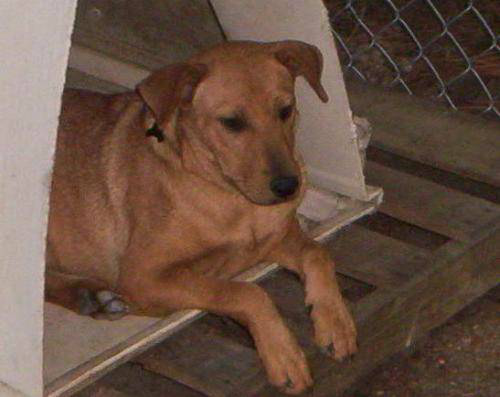

In [11]:
Image.open("train/dog.100.jpg")

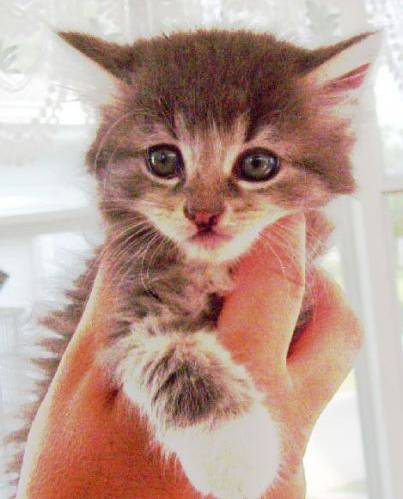

In [12]:
Image.open("train/cat.100.jpg")

In [13]:




#Filename:   xxxx.####.jpg -->  xxxx is label 

# Our aim is to create array of x_train contains images and y_train to contain labels

In [14]:
import cv2
print(f"Random dog image: {cv2.imread('train/dog.100.jpg').shape}")
print(f"Random dog image: {cv2.imread('train/cat.100.jpg').shape}")

Random dog image: (397, 500, 3)
Random dog image: (499, 403, 3)


In [15]:

 ## some steps to acheive our aim
 # Read each image from train folder using cv2 
 # convert BGR2RGB
 # resize image to (150, 150)  ? Why 150, it depends upon the dataset
 # append in array x_train

In [16]:
x_train = []
y_train = []
for filename in os.listdir("train"):
  image = cv2.imread("train/"+filename)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(150,150))
  x_train.append(image)
  if("cat" in filename):
    y_train.append("cat")
  else:
    y_train.append("dog")

In [17]:
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)


In [18]:
print(x_train.shape)
print(y_train.shape)

(25000, 150, 150, 3)
(25000,)


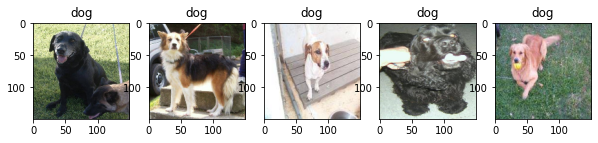

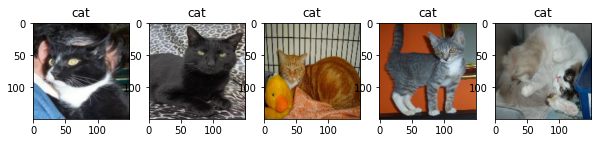

In [19]:
import matplotlib.pyplot as plt

num_of_images = 5
num_of_cat = 2

for category in ('dog', 'cat'):
  plt.figure(figsize=(10,15))
  index = np.random.choice( np.where(y_train==category)[0], num_of_images)
  for row in range(num_of_cat):
    for col in range(num_of_images):
      plt.subplot(len(category),num_of_images, col+1)
      plt.imshow(x_train[index[col]])
      plt.title(f"{category}")
  plt.show()


In [21]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [22]:
x_train_, x_test_,y_train_, y_test_ = train_test_split(x_train, y_train, test_size = 0.1) 

In [23]:
x_train_.shape, y_train_.shape

((22500, 150, 150, 3), (22500,))

In [ ]:
# Pre-processing
x_train_ = x_train_ /255.0

In [2]:
y_train_ = tf.keras.utils.to_categhorical(y_train_)

NameError: ignored